#Seção 1: Configuração Inicial

* Prepara o ambiente, configura o visual e lista os arquivos disponíveis no diretório.




In [3]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os  # Importação necessária para listar os arquivos

# Montar o Google Drive
drive.mount('/content/drive')

# Configurações de visualização
plt.style.use('ggplot')
sns.set_theme()
plt.rcParams['figure.figsize'] = (10, 6)

# Definir o caminho dos dados
path = "/content/drive/MyDrive/Mestrado/Disciplinas/6.  Elaboração de dissertação/Experimentos/03. Consolidação dos dados/dados_consolidados"

# Listar arquivos da pasta
print("Arquivos na pasta:", os.listdir(path))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Arquivos na pasta: ['evento_hardware.csv', 'hardware.csv', 'estatisticas_descritivas_comparativas.csv']


#Seção 2: Leitura e Análise Exploratória

* Muda o diretório para o caminho dos dados.
* Carrega diretamente os arquivos específicos (hardware.csv e evento_hardware.csv).
* Exibe os resumos estatísticos das métricas de hardware e combinadas com describe().

In [7]:
# Carregar os arquivos
dataset1 = pd.read_csv("hardware.csv")  # Métricas de hardware
dataset2 = pd.read_csv("evento_hardware.csv")  # Métricas combinadas

# Resumo inicial
print("Resumo - Métricas de hardware")
print(dataset1.describe())
print("\nResumo - Métricas combinadas")
print(dataset2.describe())

Resumo - Métricas de hardware
       01_requisicoes_por_segundo   02_latencia  03_tempo_resposta  \
count                23418.000000  23432.000000       23432.000000   
mean                    66.091953      0.668346           0.502214   
std                    102.723141      0.306677           0.297663   
min                      0.027785      0.169243           0.169089   
25%                     12.802586      0.447149           0.275168   
50%                     23.949809      0.473205           0.442869   
75%                     39.172236      0.955167           0.515501   
max                    361.577608      2.003409           2.001790   

       04_percentual_de_sucesso_das_requisicoes  05_escalabilidade_reticulum  \
count                              23432.000000                 23436.000000   
mean                                   0.984913                     2.455453   
std                                    0.021179                     0.678245   
min                

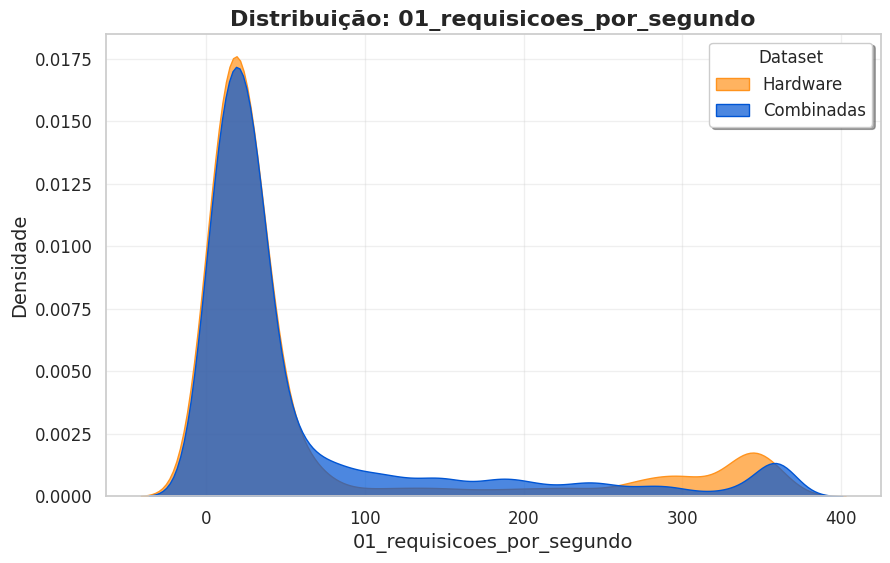

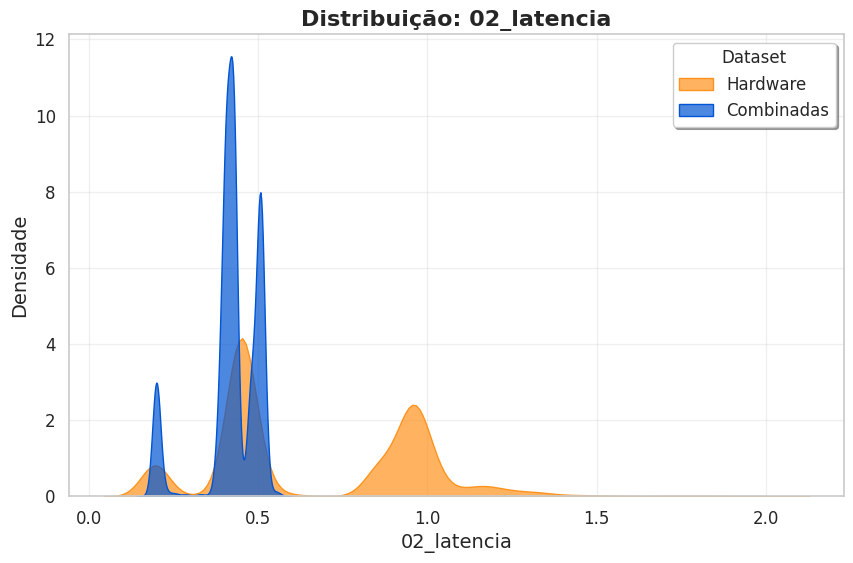

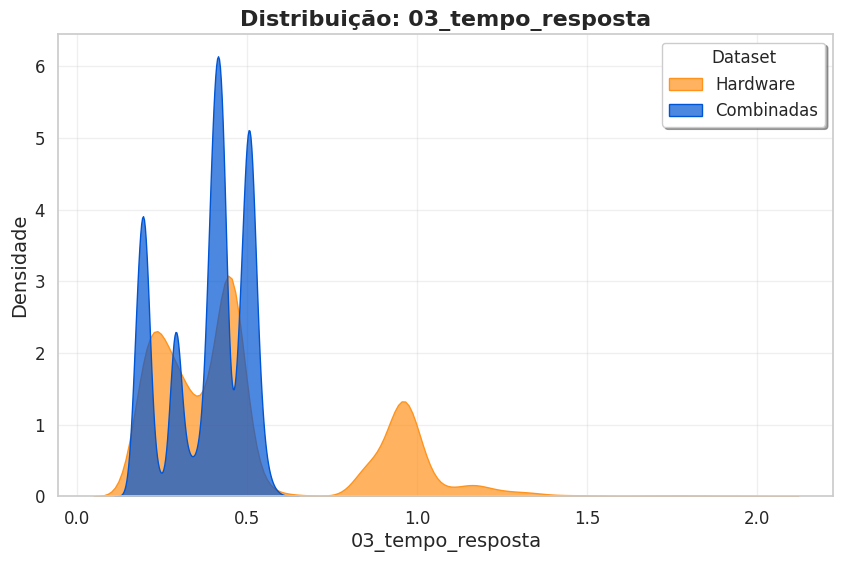

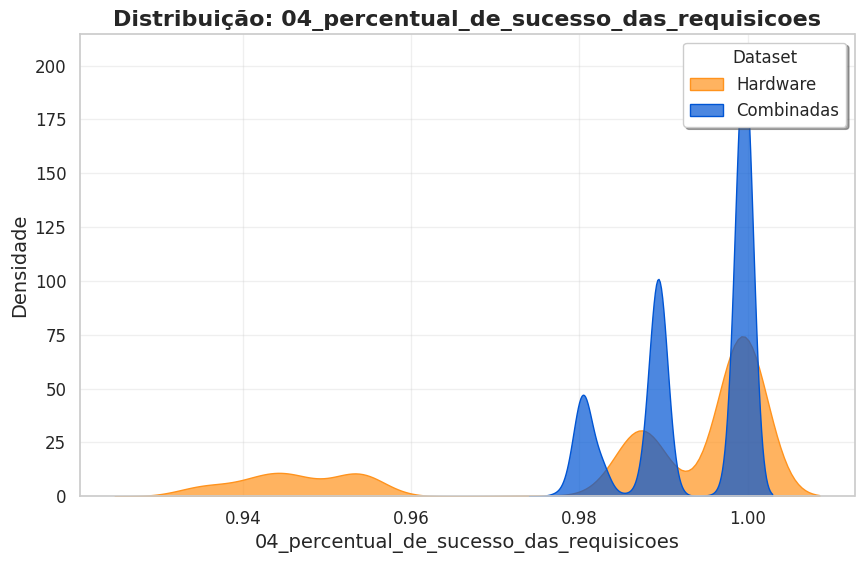

In [14]:
# Especificar as colunas de interesse para análise
colunas_interesse = ["01_requisicoes_por_segundo", "02_latencia", "03_tempo_resposta", "04_percentual_de_sucesso_das_requisicoes"]

# Configurar o estilo do gráfico
sns.set_theme(style="whitegrid")

# Paleta de cores para os gráficos
hardware_color = "#ff931dff"
combinadas_color = "#0055d4ff"

# Comparação das distribuições das colunas específicas
for col in colunas_interesse:
    if col in dataset1.columns and col in dataset2.columns:  # Garantir que a coluna existe nos dois datasets
        plt.figure(figsize=(10, 6))  # Tamanho maior para melhor visualização
        sns.kdeplot(dataset1[col], label="Hardware", fill=True, color=hardware_color, alpha=0.7, linewidth=1)
        sns.kdeplot(dataset2[col], label="Combinadas", fill=True, color=combinadas_color, alpha=0.7, linewidth=1)
        plt.title(f"Distribuição: {col}", fontsize=16, fontweight="bold")  # Título com destaque
        plt.xlabel(col, fontsize=14)  # Rótulo do eixo X
        plt.ylabel("Densidade", fontsize=14)  # Rótulo do eixo Y
        plt.xticks(fontsize=12)  # Tamanho dos números no eixo X
        plt.yticks(fontsize=12)  # Tamanho dos números no eixo Y
        plt.legend(fontsize=12, frameon=True, loc="upper right", shadow=True, title="Dataset")  # Legenda com título e sombra
        plt.grid(visible=True, alpha=0.3)  # Suavizar o grid para ficar menos intrusivo
        plt.show()
    else:
        print(f"A coluna '{col}' não foi encontrada em um ou ambos os datasets.")




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Arquivos na pasta: ['evento_hardware.csv', 'hardware.csv', 'estatisticas_descritivas_comparativas.csv']


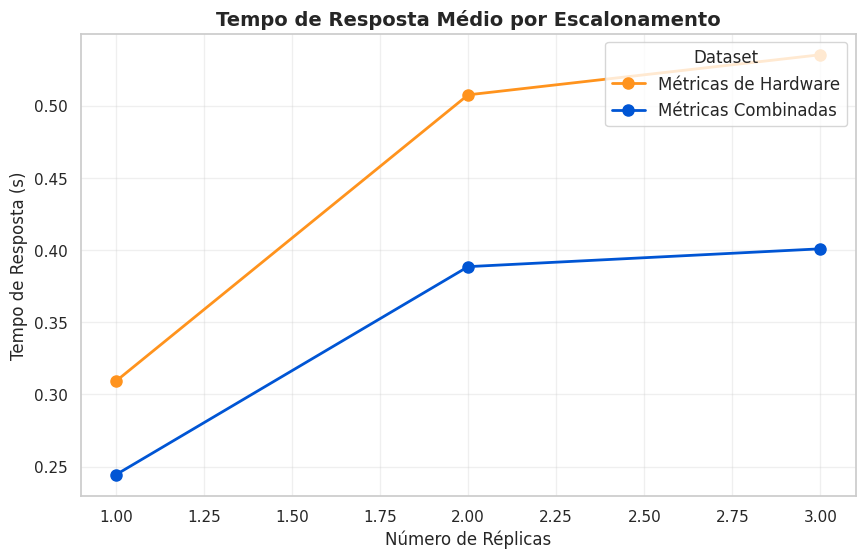

In [16]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

# Montar o Google Drive
drive.mount('/content/drive')

# Configurações de visualização
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Definir o caminho dos dados
path = "/content/drive/MyDrive/Mestrado/Disciplinas/6.  Elaboração de dissertação/Experimentos/03. Consolidação dos dados/dados_consolidados"

# Listar arquivos da pasta
print("Arquivos na pasta:", os.listdir(path))

# Alterar para o diretório de trabalho
os.chdir(path)

# Carregar os datasets
hardware_data = pd.read_csv("hardware.csv")  # Dataset de métricas de hardware
combined_data = pd.read_csv("evento_hardware.csv")  # Dataset de métricas combinadas

# Agrupar e calcular o tempo de resposta médio por número de réplicas
hardware_mean_response = hardware_data.groupby("05_escalabilidade_reticulum")["03_tempo_resposta"].mean()
combined_mean_response = combined_data.groupby("05_escalabilidade_reticulum")["03_tempo_resposta"].mean()

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(
    hardware_mean_response,
    label="Métricas de Hardware",
    color="#FF931D",
    marker="o",
    linewidth=2,
    markersize=8
)
plt.plot(
    combined_mean_response,
    label="Métricas Combinadas",
    color="#0055D4",
    marker="o",
    linewidth=2,
    markersize=8
)

# Adicionar título e rótulos aos eixos
plt.title("Tempo de Resposta Médio por Escalonamento", fontsize=14, fontweight="bold")
plt.xlabel("Número de Réplicas", fontsize=12)
plt.ylabel("Tempo de Resposta (s)", fontsize=12)

# Configurar legenda e grade
plt.legend(fontsize=12, loc="upper right", title="Dataset", title_fontsize=12, frameon=True)
plt.grid(visible=True, alpha=0.3)

# Mostrar o gráfico
plt.show()

